In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import seaborn as sns
sns.set(style="darkgrid")
from scipy import stats

In [2]:
data_types = {'Recall Notification Date': str}
df = pd.read_csv("database.csv", dtype=data_types)

In [3]:
df.dtypes

Record ID                     int64
NHTSA Campaign               object
Manufacturer Campaign        object
Vehicle Make                 object
Vehicle Model                object
Model Year                    int64
Vehicle Manufacturer         object
Recall Type                  object
Recall Component             object
Manufacture Start Date      float64
Manufacture End Date        float64
Estimated Units             float64
Recall Initiative            object
Recall Manufacturer          object
Recall Notification Date     object
dtype: object

In [5]:
set(df['Vehicle Manufacturer'])

{nan,
 'Allied Recreation Group, Inc.',
 'Stoughton Trailers, LLC',
 'Hankook Tire America Corp.',
 'NATIONAL AMBULANCE BLDRS',
 'QUALITY COACHES INC.',
 'Trails West Manufacturing Of Idaho, Inc.',
 'FEDERAL-MOGUL CORPORATION',
 'MID BUS INCORPORATED',
 'PILGRIM INTERNATIONAL INC',
 'CHANGZHOU NANXIASHU TOOLS CO., LTD',
 'EBL ENTERPRISES, INC.',
 'BOSS HOSS CYCLE',
 'TESLA MOTORS',
 'HOLLAND BINKLEY COMPANY',
 'FRAM',
 'HENDRICKSON INTERNATIONAL',
 'TEST RITE PRODUCTS CORP.',
 'HENDRICKSON MFG. CO.',
 'ARVINMERITOR, INC',
 'U.S. CARGO',
 'OX BODIES, INC.',
 'TRACKER MARINE L.P.',
 'RAYMOND UTILITY TRAILERS',
 'NORTHLAND INDUSTRIES, INC.',
 'FINISH LINE',
 'RIDE-AWAY CORPORATION',
 'SNUG SEAT, IN.',
 'HOUSEHOLD',
 'COLLINS BUS CORPORATION',
 'EATON CORPORATION',
 'AMERTEK, INC.',
 'WILSON TRAILER COMPANY',
 'KREIDLER IMPORT CORP.',
 'PRIDE',
 "MIKE'S PERFORMANCE AUDIO",
 'MOZO PRODUCTS, LLC',
 'NISSAN DIESEL AMERICA, INC',
 'AUTOSTART',
 'GNU INDUSTRIES, INC.',
 'Mercedes-Benz USA, LLC 

In [85]:
recalls_by_manufacturer_series = df.groupby('Vehicle Manufacturer').size()
#recalls_by_manufacturer_series.sort_values(ascending=False)[:50]
#set([type(x) for x in recalls_by_manufacturer_series.index.values])
companies = [str(x) for x in recalls_by_manufacturer_series.index.values]
my_regex = "aud.*"
[x for x in companies if re.match(my_regex, x, flags=re.IGNORECASE)]
#np.where(re.match("general*", companies, flags=re.IGNORECASE))

['AUDIOVOX CORPORATION', 'AUDIOVOX SPECIALIZED APPLICATIONS, LLC']

In [87]:
mercedes = {
    'MERCEDES-BENZ USA, INC.',
    'MERCEDES-BENZ USA, LLC - DBA SPRINTER',
    'MERCEDES-BENZ USA, LLC.',
    'Mercedes-Benz USA, LLC - DBA Sprinter',
    'Mercedes-Benz USA, LLC.'
}
bmw = {
    'BMW OF NORTH AMERICA, LLC',
    'BMW of North America, LLC'
}
volkswagen = {
    'VOLKSWAGEN OF AMERICA, INC',
    'VOLKSWAGEN OF AMERICA,INC',
    'Volkswagen Group of America, Inc.',
    'Volkswagen of America, Inc.'
}
porsche = {
    'PORSCHE CARS N.A. INC.',
    'PORSCHE CARS NORTH AMERICA, INC.',
    'PORSCHE CARS OF NORTH AMERICA',
    'Porsche Cars North America, Inc.'
}
german = set().union(mercedes, bmw, volkswagen, porsche)
german

{'BMW OF NORTH AMERICA, LLC',
 'BMW of North America, LLC',
 'MERCEDES-BENZ USA, INC.',
 'MERCEDES-BENZ USA, LLC - DBA SPRINTER',
 'MERCEDES-BENZ USA, LLC.',
 'Mercedes-Benz USA, LLC - DBA Sprinter',
 'Mercedes-Benz USA, LLC.',
 'PORSCHE CARS N.A. INC.',
 'PORSCHE CARS NORTH AMERICA, INC.',
 'PORSCHE CARS OF NORTH AMERICA',
 'Porsche Cars North America, Inc.',
 'VOLKSWAGEN OF AMERICA, INC',
 'VOLKSWAGEN OF AMERICA,INC',
 'Volkswagen Group of America, Inc.',
 'Volkswagen of America, Inc.'}

In [69]:
toyota = {
    'TOYOTA MOTOR CO., LTD.',
    'TOYOTA MOTOR NORTH AMERICA, INC.',
    'Toyota Motor Engineering & Manufacturing'
}
honda = {
    'HONDA (AMERICAN HONDA MOTOR CO.)',
    'HONDA OF MINOLA',
    'Honda (American Honda Motor Co.)'
}
nissan = {
    'NISSAN DIESEL AMERICA, INC',
    'NISSAN NORTH AMERICA, INC.',
    'Nissan North America, Inc.'
}
suzuki = {
    'Suzuki Motor of America, Inc.'
}
mazda = {
    'MAZDA (NORTH AMERICA),INC',
    'MAZDA MOTOR CORP',
    'MAZDA NORTH AMERICAN OPERATIONS',
    'Mazda North American Operations'
}
mitsubishi = {
    'MITSUBISHI AMERICA',
    'MITSUBISHI CARIBBEAN',
    'MITSUBISHI FUSO TRK, AMER',
    'MITSUBISHI FUSO TRUCK OF AMERICA, INC.',
    'MITSUBISHI MANUFACTURING AMER',
    'MITSUBISHI MOTORS NORTH AMERICA, INC.',
    'Mitsubishi Fuso Truck of America, Inc.',
    'Mitsubishi Motors North America, Inc.'
}
subaru = {
    'SUBARU OF AMERICA, INC.',
    'Subaru of America, Inc.'
}
isuzu = {
    'ISUZU MANUFACTURING SERVICES OF AMERICA',
    'ISUZU MOTORS LIMITED',
    'Isuzu Manufacturing Services of America',
    'Isuzu Technical Center of America, Inc.'
}
japanese = set().union(toyota, honda, nissan, suzuki, mazda, mitsubishi, subaru, isuzu)
japanese

{'HONDA (AMERICAN HONDA MOTOR CO.)',
 'HONDA OF MINOLA',
 'Honda (American Honda Motor Co.)',
 'ISUZU MANUFACTURING SERVICES OF AMERICA',
 'ISUZU MOTORS LIMITED',
 'Isuzu Manufacturing Services of America',
 'Isuzu Technical Center of America, Inc.',
 'MAZDA (NORTH AMERICA),INC',
 'MAZDA MOTOR CORP',
 'MAZDA NORTH AMERICAN OPERATIONS',
 'MITSUBISHI AMERICA',
 'MITSUBISHI CARIBBEAN',
 'MITSUBISHI FUSO TRK, AMER',
 'MITSUBISHI FUSO TRUCK OF AMERICA, INC.',
 'MITSUBISHI MANUFACTURING AMER',
 'MITSUBISHI MOTORS NORTH AMERICA, INC.',
 'Mazda North American Operations',
 'Mitsubishi Fuso Truck of America, Inc.',
 'Mitsubishi Motors North America, Inc.',
 'NISSAN DIESEL AMERICA, INC',
 'NISSAN NORTH AMERICA, INC.',
 'Nissan North America, Inc.',
 'SUBARU OF AMERICA, INC.',
 'Subaru of America, Inc.',
 'Suzuki Motor of America, Inc.',
 'TOYOTA MOTOR CO., LTD.',
 'TOYOTA MOTOR NORTH AMERICA, INC.',
 'Toyota Motor Engineering & Manufacturing'}

In [70]:
gm = {
    'GENERAL MOTORS CORP.',
    'GENERAL MOTORS LLC',
    'General Motors LLC'
}
ford = {
    'FORD MOTOR COMPANY',
    'FORD MOTOR COMPANY test adw as',
    'FORD MTR CO-OVERSEAS',
    'Ford Motor Company'
}
daimler = {
    'DAIMLER BUSES NORTH AMERICA, INC.',
    'DAIMLER BUSES NORTH CAROLINA',
    'DAIMLER TRUCKS NORTH AMERICA',
    'DAIMLERCHRYSLER COMMERCIAL BUSES NA',
    'DAIMLERCHRYSLER COMMERCIAL BUSES NC',
    'DAIMLERCHRYSLER CORPORATION',
    'DAIMLERCHRYSLER MANUFACTUR INTERNATIONAL',
    'DAIMLERCHRYSLER MANUFACTURING INTL',
    'Daimler Buses North America',
    'Daimler Trucks North America',
    'Daimler Trucks North America LLC',
    'Daimler Vans USA, LLC'
}
tesla = {
    'TESLA MOTORS',
    'TESLA MOTORS, INC',
    'Tesla Motors, Inc',
    'Tesla Motors, Inc.'
}
american = set().union(gm, ford, daimler, tesla)
american

{'DAIMLER BUSES NORTH AMERICA, INC.',
 'DAIMLER BUSES NORTH CAROLINA',
 'DAIMLER TRUCKS NORTH AMERICA',
 'DAIMLERCHRYSLER COMMERCIAL BUSES NA',
 'DAIMLERCHRYSLER COMMERCIAL BUSES NC',
 'DAIMLERCHRYSLER CORPORATION',
 'DAIMLERCHRYSLER MANUFACTUR INTERNATIONAL',
 'DAIMLERCHRYSLER MANUFACTURING INTL',
 'Daimler Buses North America',
 'Daimler Trucks North America',
 'Daimler Trucks North America LLC',
 'Daimler Vans USA, LLC',
 'FORD MOTOR COMPANY',
 'FORD MOTOR COMPANY test adw as',
 'FORD MTR CO-OVERSEAS',
 'Ford Motor Company',
 'GENERAL MOTORS CORP.',
 'GENERAL MOTORS LLC',
 'General Motors LLC',
 'TESLA MOTORS',
 'TESLA MOTORS, INC',
 'Tesla Motors, Inc',
 'Tesla Motors, Inc.'}

In [89]:
def country_manufacturer(name):
    if name in american:
        return 'american'
    elif name in japanese:
        return 'japanese'
    elif name in german:
        return 'german'
    else:
        return 'other'

In [91]:
df['country'] = df['Vehicle Manufacturer'].apply(country_manufacturer)

In [121]:
df['ones'] = df['country'].apply(lambda x: 1)

In [156]:
col_subset = df[['Model Year', 'country', 'ones']]
col_subset = col_subset.loc[~col_subset['Model Year'].isin([9999, 2017, 2018])]
col_subset = col_subset.groupby(['Model Year', 'country'], as_index=False).count()
col_subset

,Model Year,country,ones
0,1949,german,1
1,1950,german,1
2,1951,german,1
3,1952,german,1
4,1953,german,1
5,1954,german,1
6,1955,german,1
7,1955,other,3
8,1956,german,1
9,1956,other,7


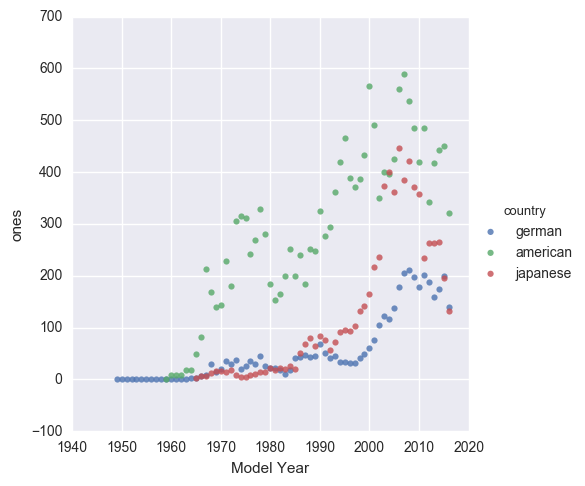

In [185]:
sns.lmplot(x='Model Year', y='ones', data=col_subset[col_subset['country'] != 'other'], hue='country', fit_reg=False)
plt.show()

In [150]:
col_subset.dtypes

Model Year     int64
country       object
ones           int64
dtype: object